# Used Car Price Prediction - Data Exploration & Cleaning


This notebook explores and cleans the Craigslist Cars & Trucks dataset.
The goal is to produce a clean, model-ready dataset for price prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Kernel works!")

plt.style.use("default")
pd.set_option("display.max_columns", None)

Kernel works!


In [ ]:
# Load Dataset

df = pd.read_csv("../data/vehicles.csv")
df.head()


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
# Dataset Shape & Info

df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5000 non-null   int64  
 1   url           5000 non-null   object 
 2   region        5000 non-null   object 
 3   region_url    5000 non-null   object 
 4   price         5000 non-null   int64  
 5   year          4914 non-null   float64
 6   manufacturer  4681 non-null   object 
 7   model         4928 non-null   object 
 8   condition     2951 non-null   object 
 9   cylinders     3136 non-null   object 
 10  fuel          4893 non-null   object 
 11  odometer      4961 non-null   float64
 12  title_status  4820 non-null   object 
 13  transmission  4970 non-null   object 
 14  VIN           3168 non-null   object 
 15  drive         3261 non-null   object 
 16  size          1351 non-null   object 
 17  type          3762 non-null   object 
 18  paint_color   3933 non-null 

In [4]:
# Missing Values Overview

df.isnull().sum().sort_values(ascending=False)


county          5000
size            3649
condition       2049
cylinders       1864
VIN             1832
drive           1739
type            1238
paint_color     1067
manufacturer     319
title_status     180
fuel             107
year              86
model             72
long              67
lat               67
odometer          39
transmission      30
description       27
posting_date      27
image_url         27
region_url         0
url                0
id                 0
region             0
price              0
state              0
dtype: int64

In [5]:
# Descriptive Statistics

df.describe()


,id,price,year,odometer,county,lat,long
count,5.000000e+03,5.000000e+03,4914.000000,4.961000e+03,0.0,4933.000000,4933.000000
mean,7.309308e+09,2.376322e+05,2011.910867,1.323832e+05,NaN,33.591293,-86.615230
std,8.113448e+06,1.403837e+07,9.500179,6.287948e+05,NaN,3.125114,4.819092
min,7.208550e+09,0.000000e+00,1903.000000,0.000000e+00,NaN,-81.838232,-149.905529
25%,7.305789e+09,7.980000e+03,2009.000000,2.934200e+04,NaN,32.350000,-86.980000
50%,7.310308e+09,1.898650e+04,2014.000000,7.512300e+04,NaN,33.520000,-86.741000
75%,7.313780e+09,2.999000e+04,2017.000000,1.399000e+05,NaN,34.570000,-86.096700
max,7.316890e+09,9.876543e+08,2021.000000,9.999999e+06,NaN,61.598500,-54.052734


### Initial Observations
- The dataset contains a large number of missing values in several columns.
- Prices and odometer readings include extreme outliers.
- Not all columns are useful for price prediction.


In [6]:
# Remove Unrealistic Prices

df = df[df["price"].between(500, 100000)]
df.shape


(4701, 26)

In [7]:
# Remove Unrealistic Odometer & Year

df = df[df["odometer"].between(0, 300000)]
df = df[df["year"].between(1985, 2024)]
df.shape


(4485, 26)

In [8]:
# Select Relevant Columns

columns = [
    "price",
    "year",
    "manufacturer",
    "model",
    "condition",
    "cylinders",
    "fuel",
    "odometer",
    "transmission",
    "drive",
    "type",
    "state"
]

df = df[columns]
df.head()


,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,state
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,NaN,pickup,al
28,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,NaN,pickup,al
29,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,NaN,pickup,al
30,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,NaN,pickup,al
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,truck,al


In [9]:
# Handle Missing Values

df = df.dropna(subset=["price", "year", "odometer"])

fill_cols = ["condition", "cylinders", "fuel", "transmission", "drive", "type"]

for col in fill_cols:
    df[col] = df[col].fillna("unknown")


In [10]:
# Feature Engineering

from datetime import datetime

current_year = datetime.now().year
df["car_age"] = current_year - df["year"]

df["log_odometer"] = np.log1p(df["odometer"])


In [11]:
# Drop Redundant Columns

df = df.drop(columns=["year", "odometer"])
df.head()


,price,manufacturer,model,condition,cylinders,fuel,transmission,drive,type,state,car_age,log_odometer
27,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,other,unknown,pickup,al,11.0,10.966887
28,22590,chevrolet,silverado 1500,good,8 cylinders,gas,other,unknown,pickup,al,15.0,11.173669
29,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,other,unknown,pickup,al,5.0,9.860632
30,30990,toyota,tundra double cab sr,good,8 cylinders,gas,other,unknown,pickup,al,8.0,10.624371
31,15000,ford,f-150 xlt,excellent,6 cylinders,gas,automatic,rwd,truck,al,12.0,11.759793


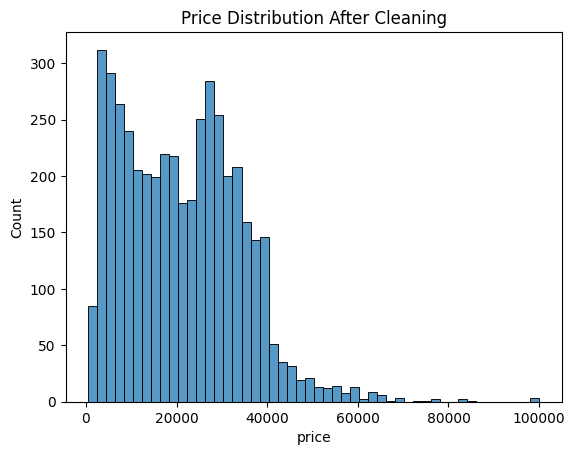

In [12]:
# Distribution Visualization

plt.figure()
sns.histplot(df["price"], bins=50)
plt.title("Price Distribution After Cleaning")
plt.show()


In [13]:
# Final Dataset Overview

df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4485 entries, 27 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4485 non-null   int64  
 1   manufacturer  4300 non-null   object 
 2   model         4462 non-null   object 
 3   condition     4485 non-null   object 
 4   cylinders     4485 non-null   object 
 5   fuel          4485 non-null   object 
 6   transmission  4485 non-null   object 
 7   drive         4485 non-null   object 
 8   type          4485 non-null   object 
 9   state         4485 non-null   object 
 10  car_age       4485 non-null   float64
 11  log_odometer  4485 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 455.5+ KB


In [ ]:
# Saved Cleaned Data

df.to_csv("../data/cleaned_vehicles.csv", index=False)

# Save small GitHub-safe sample
df.to_csv("../data/cleaned_vehicles_sample.csv", index=False)



### Summary
- Removed invalid and extreme outliers
- Selected relevant features
- Engineered useful predictors
- Produced a clean dataset for modeling

Next step: Train baseline and advanced ML models.
